<a href="https://colab.research.google.com/github/Pranish-Pantha/Tensorflow-Google-Colabs/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a tutorial on Polynomial Regression. We will be covering topics such as gradient descent, generating random datasets, underfitting and overfitting.

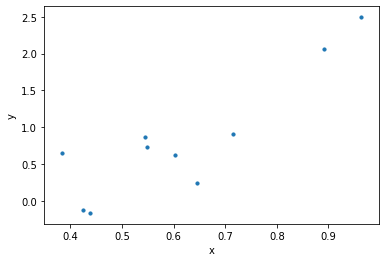

In [0]:
import math
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0) #This makes sure that the random numbers generated are the same with each runtime. This ensures you can reliable test changes in your code
x = np.random.rand(10, 1) #This generates 10 random values from the range 0-1 for x values
y = 3*(x)**3 - x +np.random.rand(10, 1) # This generates 10 random values that follow a cubic pattern for y values
plt.scatter(x,y,s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
# This plots the data as a scatterplot

The above code shows us how to generate a random dataset and plot them. It is important later on that you use a numpy array. We can see that the pattern of the data is vaguely cubic, as supported by how we generated the y values. 

Now before we go to the next section, we need to know about gradient descent. Gradient descent is an algorithm used to find the minimums of a multivariable function. Anyone taking calculus 1 should be familiar with finding the minimums of a single variable equation: Taking the derivative of the function and setting it to 0. While this is not so simple for multivariable functions, the goal is essentially the same. One just takes partial derivatives (which are like normal derivatives, but with respect to specific variables) and use those to slowly move towards the minimum.
This is the algorithm I will be using for gradient descent:
$x_{n+1} = x_{n} - \alpha\nabla\text{f(a)}$

This is a recursive process. The next value for x (or any variable) is equal to the prior value of x minus $\alpha$ times the gradient of the cost function. 

$\alpha$ is the learning rate, which describes how quickly the solution will converge. If it is too high, oscilations will occur. If it is too low, the solution might not be reached.

The cost function is the culmination of the error. For our example of regression, it will be the difference between predicted and actual y values (squared) divided by 2 times the number of data sets. $\frac{1}{2m}\sum{error^2}$ There are other measures of how well a model fits a dataset, but we will be using the cost function to evaluate our examples.

The gradient can essentially be split up into partial derivatives for each variable. In our example of regression, we will calculate the gradient vectors through doing numpy.dot($x^n$, error). This uses matches the derivative of the cost function: $\frac{1}{m}\sum{(error)(x^n)}$
The $x^n$ comes in because of the seperation of the cost function to each variable.

Remember, the ultimate goal is to move the value of the cost function and each gradient vector to 0 because this means that the error is reaching a minimum.

In [0]:
class PolyRegression: 
  def __init__(self, degree,x, alpha, cycles=1000): 
    self.alpha = alpha # This is the learning rate
    self.cycles = cycles # This is the number of iterations you run the gradient descent
    self.degree = degree # This is the highest polynomial degree regression of the instance (1-3).
    self.cost_ = [] # This stores the cost function values, usually for testing
    self.w_ = np.zeros((x.shape[1], 1)) # This is the value of the constant variable
    self.w1_ = np.zeros((x.shape[1], 1)) # This is the value of the coeffiecient for the first degree
    self.w2_ = np.zeros((x.shape[1], 1)) # This is the value of the coeffiecient for the second degree
    self.w3_ = np.zeros((x.shape[1], 1)) # This is the value of the coeffiecient for the third degree
    self.m = x.shape[0] # This is the number of data points
    self.c = [1]*self.m # This is a value meant to shape the constant variables gradient properly
  def fit(self, x, y):
    if(self.degree==1):
      for _ in range(self.cycles):
          y_pred = np.dot(x, self.w1_) +self.w_ # Given the current values of each variable, it predicts y values for each x value
          residuals = y_pred - y # This finds the error between the predicted and the actual
          derivative1 = np.dot(x.T, residuals) 
          derivative0 = np.dot(self.c, residuals)
          # These are how the partial derivatives are found
          self.w1_ -= (self.alpha / self.m) * derivative1 
          self.w_ -= (self.alpha/self.m) * derivative0
          # These are the applications of the algorithm to change the variable values so they minimize error
          cost = np.sum((residuals ** 2)) / (2 * self.m) # This caclulates the cost function
          self.cost_.append(cost)
    if(self.degree==2): # Everything serves the same function as in the first degree
      for _ in range(self.cycles):
          y_pred = np.dot(x**2, self.w2_)+np.dot(x, self.w1_) +self.w_
          residuals = y_pred - y
          derivative2 = np.dot((x.T)**2,residuals)
          derivative1 = np.dot(x.T, residuals)
          derivative0 = np.dot(self.c, residuals)
          self.w2_ -= (self.alpha / self.m) * derivative2
          self.w1_ -= (self.alpha / self.m) * derivative1
          self.w_ -= (self.alpha/self.m) * derivative0
          cost = np.sum((residuals ** 2)) / (2 * self.m)
          self.cost_.append(cost)
    if(self.degree == 3):# Everything serves the same function as in the first degree
      for _ in range(self.cycles):
        y_pred = np.dot(x**3, self.w3_)+np.dot(x**2, self.w2_)+np.dot(x, self.w1_) +self.w_
        residuals = y_pred - y
        derivative3 = np.dot((x.T)**3, residuals)
        derivative2 = np.dot((x.T)**2,residuals)
        derivative1 = np.dot(x.T, residuals)
        derivative0 = np.dot(self.c, residuals)
        self.w3_ -= (self.alpha / self.m) * derivative3
        self.w2_ -= (self.alpha / self.m) * derivative2
        self.w1_ -= (self.alpha / self.m) * derivative1
        self.w_ -= (self.alpha/self.m) * derivative0
        cost = np.sum(residuals**2) / (2 * self.m)
        self.cost_.append(cost)
    return self
  def printWeights(self, x):
        print(self.w_, self.w1_, self.w2_, self.w3_) # Prints the values of all variables
        return 0

This is the class we will use to make the regression curves for our data. All functionality is described with comments. 

[[-0.91333069]] [[2.8601579]] [[0.]] [[0.]]
Final cost:  0.09410419418996062


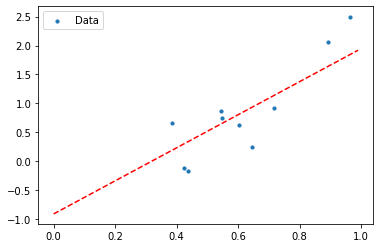

In [0]:
b = np.arange(0,1,0.01)
b = b.reshape([100, 1])
n = PolyRegression(1, x,0.05)
n.fit(x,y)
z = n.printWeights(x)
lineOriginal = plt.scatter(x,y,s=10)
lineNew = plt.plot(b, n.w1_ *(b) + n.w_, 'r--')
plt.legend([lineOriginal], ["Data"])
print("Final cost: ",n.cost_[-1])

This is a linear regression of our generated data. Based on the printed variable values, you know the equation for the line is $y = 2.86x - 0.91$
However, we can see the line doesn't fit the curve that well, so we should move to a higher degree.

[[-0.6820613]] [[1.09719203]] [[2.0359276]] [[0.]]
Final cost:  0.06383685657269429


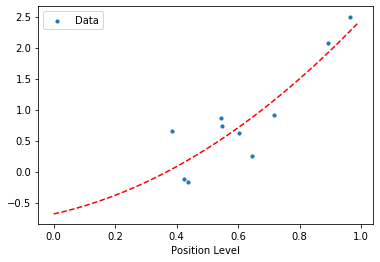

In [0]:
n = PolyRegression(2, x,0.05)
n.fit(x,y)
z = n.printWeights(x)
lineOriginal = plt.scatter(x,y,s=10)
lineNew = plt.plot(b, n.w2_*(b**2) + n.w1_ *(b) + n.w_, 'r--')
plt.legend([lineOriginal], ["Data"])
plt.xlabel("Position Level")
print("Final cost: ",n.cost_[-1])

This is a quadratic regression of our data. We can see the equation of the curve is $y = 2.04x^2 + 1.10x -0.68$
This is better than the linear regression but we know that the data has a cubic nature, so we should go to that.

[[-0.36745602]] [[0.54691814]] [[1.08345657]] [[1.38044896]]
Final cost:  0.056352322669538844


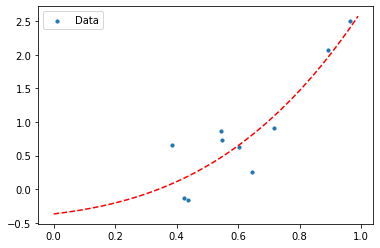

In [0]:
n = PolyRegression(3, x,0.05)
n.fit(x,y)
z = n.printWeights(x)
lineOriginal = plt.scatter(x,y,s=10)
lineNew = plt.plot(b, n.w3_*(b**3)+n.w2_*(b**2) + n.w1_ *(b) + n.w_, 'r--')
plt.legend([lineOriginal], ["Data"])
print("Final cost: ",n.cost_[-1])

This is a cubic regression of the data. The equation of the curve is $y = 1.38x^3 + 1.08x^2 + 0.55x - 0.37$
This is a good fit for our data. We could possibly reduce the cost function even more with higher degrees, but we risk overfitting the data if we do that.
Overfitting will be explained at the end.

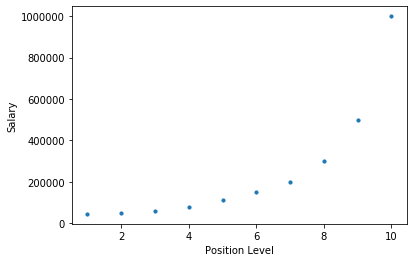

In [0]:
x = np.arange(1, 11, 1)
x = x.reshape(10, 1)
y = [45000,
50000,
60000,
80000,
110000,
150000,
200000,
300000,
500000,
1000000]
y = np.array(y)
y = y.reshape(10, 1)
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.scatter(x,y, s=10)

This was the company dataset that was provided. You can use other methods of extracting the data, but since there are not that many points you can just copy and paste the data. Looking at the graph, you can see it curves quite a bit, so let's try a quadratic regression first.

[[-1830.50585429]] [[-8616.76702146]] [[8146.83840417]] [[0.]]
Final cost:  6853720298.200323
Initial cost:  71456250000.0


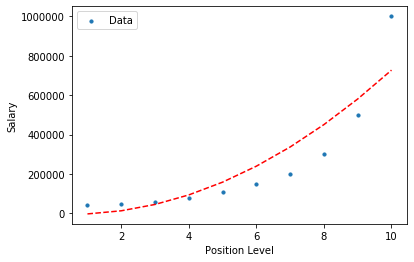

In [0]:
b = np.arange(1,11,1)
b = b.reshape([10, 1])
n = PolyRegression(2, x, 0.0001) # You need to make the learning rate small to avoid oscilations
n.fit(x,y)
z = n.printWeights(x)
lineOriginal = plt.scatter(x,y,s=10)
lineNew = plt.plot(b, n.w2_*(b**2) + n.w1_ *(b) + n.w_, 'r--')
plt.legend([lineOriginal], ["Data"])
plt.xlabel("Position Level")
plt.ylabel("Salary")
print("Final cost: ",n.cost_[-1])
print("Initial cost: ", n.cost_[0])

While the final cost function value is rather large, it is a great deal smaller than the initial cost in terms of magnitude. Let's try a cubic regression.

[[0.42274827]] [[-48.01086604]] [[-233.31750352]] [[855.44438412]]
Final cost:  3400719531.7708306
Initial cost:  71456250000.0


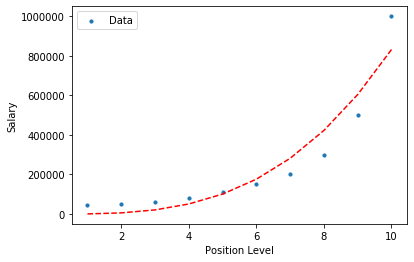

In [0]:
n = PolyRegression(3, x, 0.000001) # You need to make the learning rate small to avoid oscilations
n.fit(x,y)
z = n.printWeights(x)
lineOriginal = plt.scatter(x,y,s=10)
lineNew = plt.plot(b, n.w3_*(b**3)+n.w2_*(b**2) + n.w1_ *(b) + n.w_, 'r--')
plt.legend([lineOriginal], ["Data"])
plt.xlabel("Position Level")
plt.ylabel("Salary")
print("Final cost: ",n.cost_[-1])
print("Initial cost: ", n.cost_[0])

The final cost is half as much as it was for quadratic. Even higher degrees would likely fit the data better, but once again, you risk overfitting if you go too high

When trying to fit data to a model, you must avoid underfitting and overfitting.
Underfitting is when a model doesn't quite learn patterns in a dataset, so even predicting training data isn't very accurate. For example, if you used linear regression on the company data, you wouldn't be able to predict well.

Overfitting is when a model can't generalize because it is too influenced by the training data. It can be described as memorizing instead of learning. For example, if you had some outliers in a dataset and you use a high degree polynomial regression, your regression curve has a good chance of going through most points (even the outliers), but this could distort data prediction.
